<a href="https://colab.research.google.com/github/Anu-95/sample/blob/main/Anusha_Duggirala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
# print the shape of data

In [ ]:
x_train.shape,y_train.shape,"***************",x_test.shape,y_test.shape

((60000, 28, 28), (60000,), '***************', (10000, 28, 28), (10000,))

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

In [ ]:
class_labels=["T-shirt/top"," Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker","Bag","Ankle", "boot"]

In [ ]:
class_labels

['T-shirt/top',
 ' Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle',
 'boot']

In [ ]:
# show image

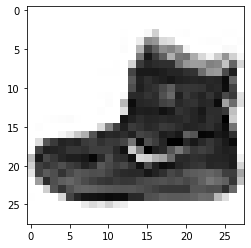

In [ ]:
plt.imshow(x_train[0],cmap='Greys')

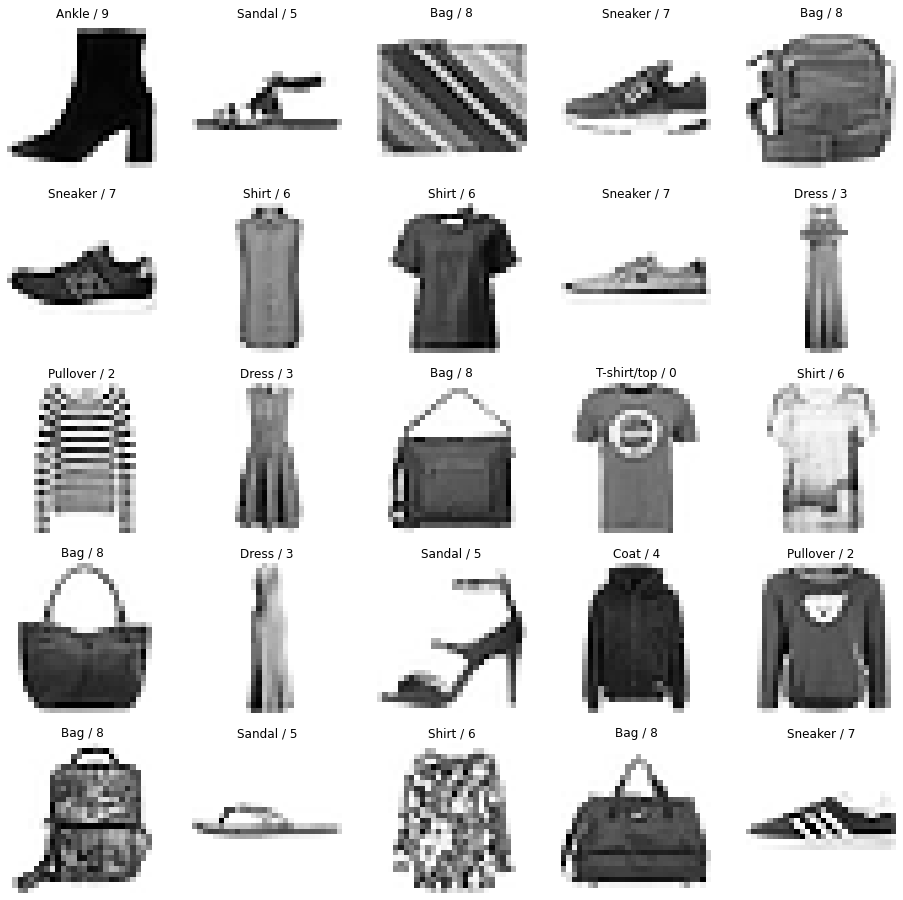

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(x_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [ ]:
x_train.ndim

3

In [ ]:
x_train =np.expand_dims(x_train,-1)

In [ ]:
x_train.ndim

4

In [ ]:
x_test=np.expand_dims(x_test,-1)

In [ ]:
# feature scaling

In [ ]:
x_train = x_train/255
x_test=x_test/255

In [ ]:
# split dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_validation,y_train,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=2020)

In [ ]:
x_train.shape,x_validation.shape,y_train.shape,y_validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

3.Building CNN Model


In [ ]:
model=keras.models.Sequential([
                      keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                      keras.layers.MaxPooling2D(pool_size=(2,2)),
                      keras.layers.Flatten(),
                      keras.layers.Dense(units=128,activation='relu'),
                      keras.layers.Dense(units=10,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(x_validation,y_validation))

Epoch 1/10
94/94 [==============================] - 25s 257ms/step - loss: 0.6414 - accuracy: 0.7777 - val_loss: 0.4547 - val_accuracy: 0.8402
Epoch 2/10
94/94 [==============================] - 23s 242ms/step - loss: 0.4014 - accuracy: 0.8599 - val_loss: 0.4037 - val_accuracy: 0.8613
Epoch 3/10
94/94 [==============================] - 24s 256ms/step - loss: 0.3500 - accuracy: 0.8761 - val_loss: 0.3632 - val_accuracy: 0.8755
Epoch 4/10
94/94 [==============================] - 23s 244ms/step - loss: 0.3202 - accuracy: 0.8878 - val_loss: 0.3420 - val_accuracy: 0.8822
Epoch 5/10
94/94 [==============================] - 23s 244ms/step - loss: 0.3008 - accuracy: 0.8949 - val_loss: 0.3335 - val_accuracy: 0.8838
Epoch 6/10
94/94 [==============================] - 25s 270ms/step - loss: 0.2904 - accuracy: 0.8980 - val_loss: 0.3193 - val_accuracy: 0.8883
Epoch 7/10
94/94 [==============================] - 32s 341ms/step - loss: 0.2715 - accuracy: 0.9033 - val_loss: 0.2979 - val_accuracy: 0.8959

In [ ]:
y_pred=model.predict(x_test)
y_pred.round(2)

313/313 [==============================] - 4s 11ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.97, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.06, 0.02, 0.  ]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.2860 - accuracy: 0.8975


[0.28597190976142883, 0.8974999785423279]

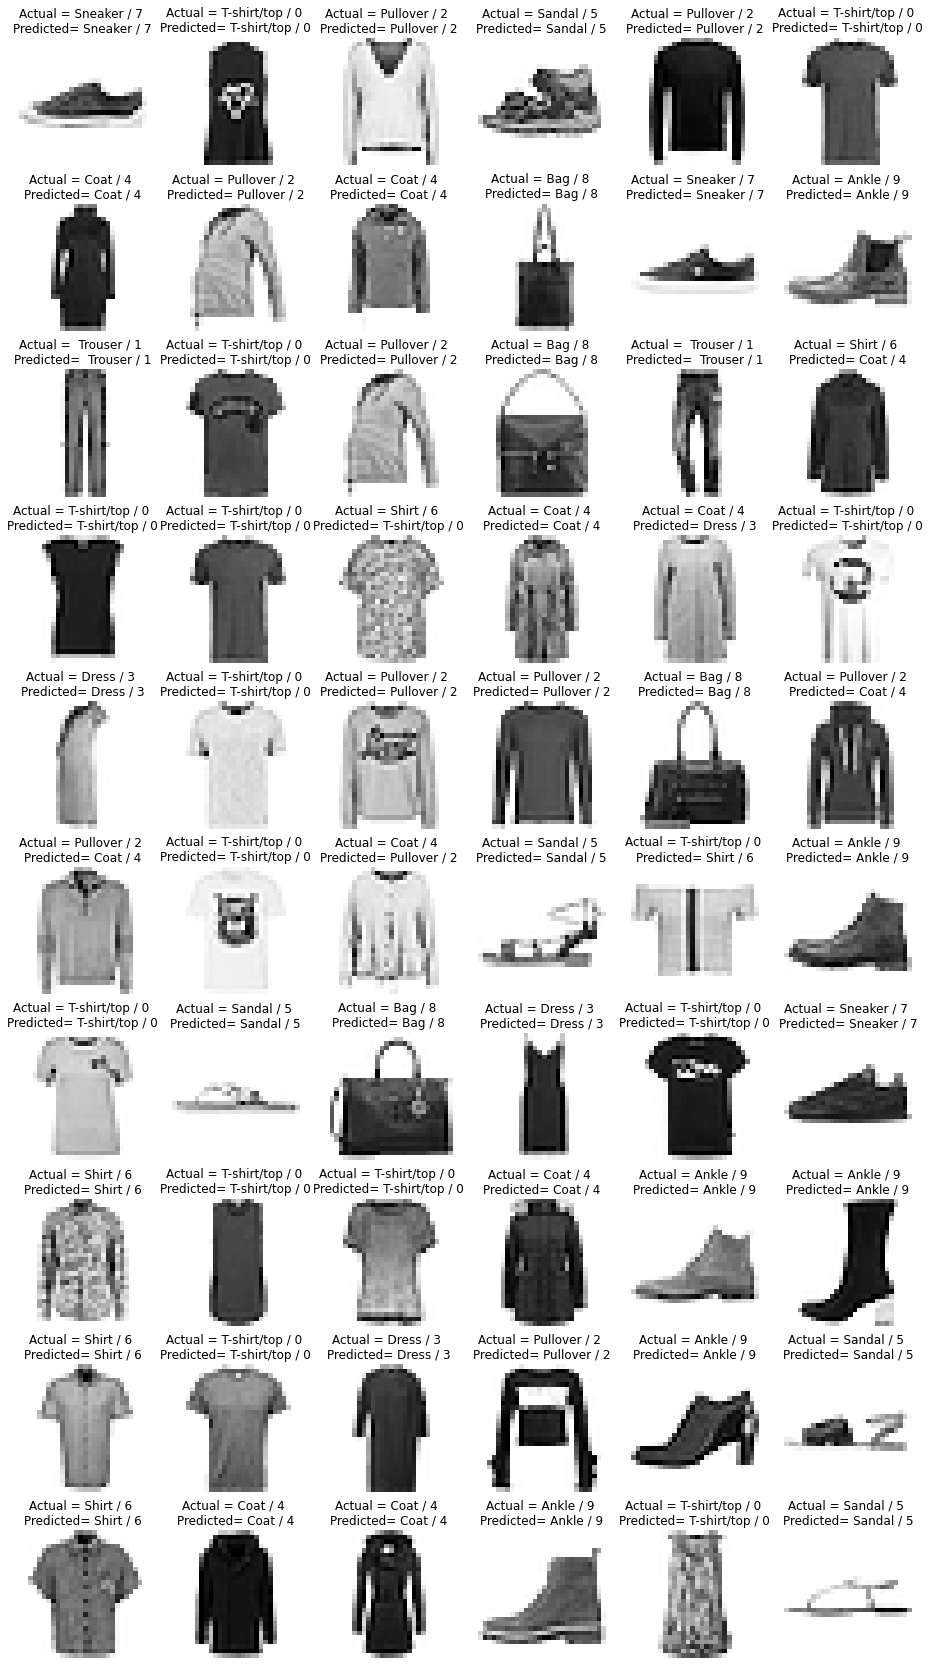

In [ ]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j);j+=1
  plt.imshow(x_test[i].reshape(28,28),cmap='Greys')
  plt.title('Actual = {} / {} \nPredicted= {} / {}'.format(class_labels[y_test[i]] ,y_test[i] ,class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')
  

In [ ]:
"""## Confusion Matrix """

'## Confusion Matrix '

In [ ]:
from  sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels=[np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test,y_pred_labels)

<Figure size 1152x648 with 0 Axes>

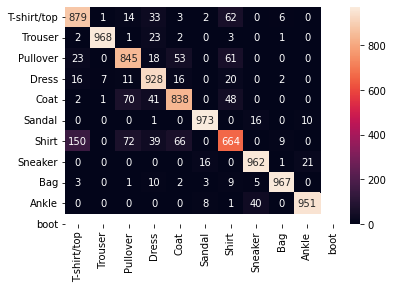

In [ ]:
sns.heatmap(cm, annot=True , fmt='d' , xticklabels=class_labels , yticklabels=class_labels)


In [ ]:
"""# save mode """

'# save mode '

In [ ]:
model.save('fashion_mnist_cnn_model.h5')

Building Complex CNN 

In [ ]:
cnn_model2 = keras.models.Sequential([
                          keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same',activation='relu'),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(units=128, activation='relu'),
                          keras.layers.Dropout (0.25), 
                          keras.layers.Dense(units=256, activation='relu'),
                          keras. layers.Dropout (0.25), 
                          keras.layers.Dense(units=128, activation='relu'),
                          keras.layers.Dense(units=10, activation='softmax')
                          ])
                          
#compile the model
cnn_model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#Train the model
cnn_model2.fit(x_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(x_validation,y_validation))

cnn_model2.save('fashion_mnist_cnn_model2.h5')



"""######## Very Complex Model"""

#Building CNN model3
cnn_model3=keras.models.Sequential([
                          keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same',activation='relu'),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same',activation='relu'),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(units=128, activation='relu'),
                          keras.layers.Dropout (0.25), 
                          keras.layers.Dense(units=256, activation='relu'),
                          keras.layers.Dropout (0.5),
                          keras.layers.Dense(units=256, activation='relu'),
                          keras. layers.Dropout (0.25), 
                          keras.layers.Dense(units=128, activation='relu'),
                          keras.layers.Dropout (0.10), 
                          keras.layers.Dense(units=128, activation='relu'),
                          keras.layers.Dense(units=10, activation='softmax')
                          ])
                          

#compile the model

cnn_model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#Train the model

cnn_model3.fit(x_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(x_validation,y_validation))

cnn_model3.save('fashion_mnist_cnn_model3.h5')

cnn_model3.evaluate(x_test,y_test)




Epoch 1/10
94/94 [==============================] - 28s 286ms/step - loss: 1.0305 - accuracy: 0.6139 - val_loss: 0.5660 - val_accuracy: 0.7819
Epoch 2/10
94/94 [==============================] - 26s 281ms/step - loss: 0.5440 - accuracy: 0.7975 - val_loss: 0.4648 - val_accuracy: 0.8349
Epoch 3/10
94/94 [==============================] - 28s 303ms/step - loss: 0.4616 - accuracy: 0.8291 - val_loss: 0.4012 - val_accuracy: 0.8532
Epoch 4/10
94/94 [==============================] - 26s 280ms/step - loss: 0.4058 - accuracy: 0.8512 - val_loss: 0.3648 - val_accuracy: 0.8665
Epoch 5/10
94/94 [==============================] - 26s 280ms/step - loss: 0.3689 - accuracy: 0.8640 - val_loss: 0.3412 - val_accuracy: 0.8750
Epoch 6/10
94/94 [==============================] - 26s 278ms/step - loss: 0.3414 - accuracy: 0.8750 - val_loss: 0.3250 - val_accuracy: 0.8787
Epoch 7/10
94/94 [==============================] - 26s 279ms/step - loss: 0.3277 - accuracy: 0.8813 - val_loss: 0.3115 - val_accuracy: 0.8817

[0.3065854609012604, 0.8935999870300293]